# Project 1: Titanic Data

Author: Justin Ventura [[jventura3@gulls.salisbury.edu]]

Date: Wednesday, October 14th, 2020.

## - Description -

The titanic data on the those who were on the titanic when it sank, whether or not they survived, and other information about each person.

In [1]:
# Libraries we shall be using.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer # start = timer(), end = timer()

t_frame = pd.read_csv('titanic_data.csv')
print('t_frame(row, col) =', t_frame.shape)
t_frame.head(10) # Print the first 9 entries.

t_frame(row, col) = (1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


### A) What type of population is being sampled? What are the “things” getting measured – usually one per row of data.

Each row is a person who was on board the titanic during the course from port to sinking.

### B) What features does each sample have, i.e. what is being measured?

The target of the dataset is to see which people survived, and if they did, could we use these features to see if they had some sort of relationship to survival: pclass, (essentially the wealth class of the person) a boolean value for their survival, (1 if they survived, 0 otherwise) their gender, age, # of siblings/spouses on board, # of parents/children on board, their ticket number, the fare they paid, which cabin they were in, where they embarked, (with respect to one of the three ports: Cherbourg, Queenstown, Southampton) which life boat they were on if any, body identification number, (if they did not survive, and their body was found) and finally their home/destination.

### C) Are the features quantitative or qualitative? Ordinal or nominal? Continuous or discrete?

**qualitative:**

Surivival, PClass, Name, Gender, Ticket Number, Cabin, Embarkation Port, Life Boat, Body Num, Home/Dest.

**quantitative:**

Age, Fare, SIBSP, PARCH.

**ordinal:**

Class, Age, Ticket, Cabin, Body Number.

**nominal**

Survival, Name, Gender, SIBSP, PARCH, Fare, Embarked, Boat.

**continuous:**

Only the fare is continuous.

**discrete**

All other values are discrete.

### D)  Is the data “complete” or do some of the samples have null or absent values for certain features? Why are these samples still useful? Why are they incomplete?

The data is incomplete.  These samples are still useful as they only lack certain features, which only excludes them from specific statistics.  The data is incomplete for those bodies not found, or those who did not have a cabin.

### E) Why are these features chosen to be part of the dataset?

These features are chosen to attempt to make a correlation between a persons survival rate on the Titanic, and their qualities; such as, whether the higher class had a higher chance of surviving, or if the male survival rate is less than the female surival rate.

### F) What are some other features that are not included but that you think might make sense to include for this dataset?

A few useful features that would be nice to have are 1) their occupation, 2) whether or not they worked on the boat, (perhaps those who worked on the boat prioritized saving others before themselves) 3) if the person was physically healthy. (maybe those were overweight or had a lung disease were less likely to survive)

### G) Give at least one way that you can pivot the dataset to get a slightly different representation of some values. Explain what this is and how you would use it for a visualization.

We could pivot the data to create a histogram for the distribution of ages that survived.

,age
count,427.000000
mean,28.918228
std,15.061481
min,0.166700
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


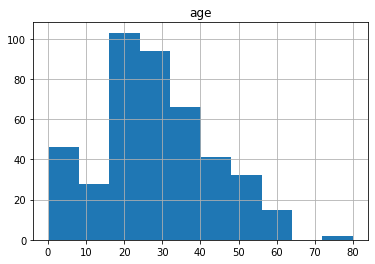

In [2]:
# TODO: pivot data

survivors = t_frame[['survived', 'age']]
survivors = survivors[(survivors['survived'] == 1) & (survivors['age'] != '?')]
del survivors['survived']

survivors[['age']] = survivors[['age']].astype(float)

survivors.hist(bins=10)
survivors.describe()

### H) Identify any possible relationships between features included in the data: which ones are likely to affect others?

Perhaps females and younger people are more likely to survive?

Males vs Females


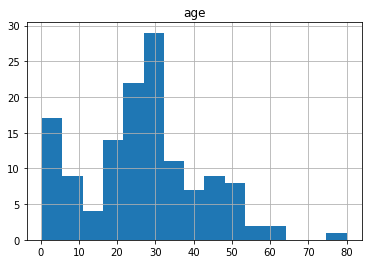

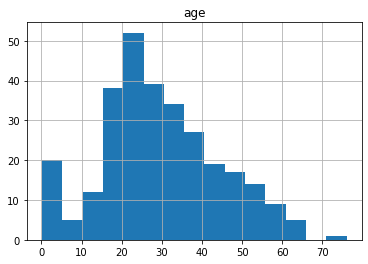

In [12]:
# NOTE: Show at least one plot or visualization to illustrate this (possible) relationship

test = t_frame[['survived', 'sex', 'age']]
m_data = test[(test['sex'] == 'male') & (test['survived'] == 1) & (test['age'] != '?')]
f_data = test[(test['sex'] == 'female') & (test['survived'] == 1) & (test['age'] != '?')]
del m_data['survived']
del m_data['sex']
del f_data['survived']
del f_data['sex']

m_data[['age']] = m_data[['age']].astype(float)
f_data[['age']] = f_data[['age']].astype(float) 

m_data.hist(bins=15)
f_data.hist(bins=15)

# NOTE: What numerical or statistical techniques might you consider using to determine whether 
# the relationship is reliable?

"""
In the discussion of whether or not more females survived than males, even if the numbers for
females suggest they were more likely to survive, I could divide each group by its sample
size to get ratios.  For example, we could see if more females surived percentage-wise compared
to males.
"""

# NOTE: Are there external inferences you think might be possible? For instance, can you hypothesize
# a relationship with data not included in the dataset? Why or why not?

"""
The first relationship I could come up with is that typically the goal would be to get the females
and children off the ship onto lifeboats first.  This could help explain why more females survived
than males.
"""

print('Males vs Females')

### I) What “extra” features can you perhaps compute from the data? For example, if you have data that includes product dates of purchase, you can “engineer” the data to construct the most popular products over various lengths of time (e.g. a particular holiday season). How might you use this information? Using the holiday example, you might try to correlate holiday sales of a product to some mainstream event that popularized it.

One thing we could calculate is the survival rate for a gender, age, or pclass.  This would be really good for a machine learning model.